<a href="https://colab.research.google.com/github/DanDeeDan/MSDS422_Assignment_1/blob/main/Huff_MSDS422_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MSDS 422 Week 1 Assignment

This assignment performs an initial Exploratory Data Analysis 
of several variables within the Kaggle.com, Ames, Iowa housing data set

Management/Research Question of Interest: How do various house variables affect the eventual Sales Price of a house in the Ames, Iowa area (at approximately the time the data was obtained)?

Why would anybody care?  If the relationship (e.g., a model) could be created to relate Sales Price to the other variables, this would be useful for making housing valuations. This could be useful in the real estate industry, in certain government agencies, for prospective real estate buyers, and by other organizations. 

### Ingress

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# get training data
from google.colab import files
upload = files.upload()

Saving train.csv to train (1).csv


In [ ]:
# load training data and perform quick inspection of first lines
initDF = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)  # display all the columns

initDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA

In [ ]:
# get general information
initDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# number of (rows, columns) in the dataframe
initDF.shape

(1460, 81)

In [ ]:
# basic descriptive statistics of all the numerical variables
initDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# missing values for each variable
pd.set_option('display.max_rows', None)  # display all the results
initDF.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Assignment Requirements #1 and 2
Focusing on dependent variable 'SalePrice' and its distribution characteristics and potential outliers ...

In [ ]:
# descriptive statistics of the dependent variable 'SalePrice'
initDF.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

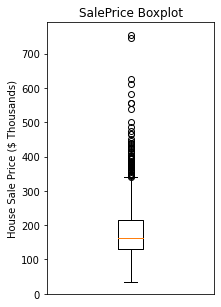

In [ ]:
# initial visualizations of 'SalePrice' data (box plot and histogram)

# boxplot
fig = plt.figure(figsize =(3, 5))
plt.boxplot(initDF.SalePrice/1000)
plt.ylabel('House Sale Price ($ Thousands)')
plt.xticks([0], [''])
plt.title('SalePrice Boxplot')
plt.show()

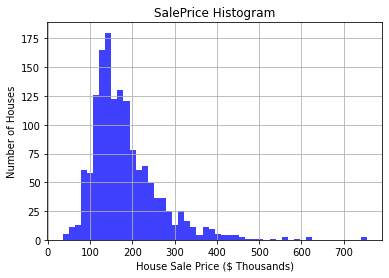

In [ ]:
# histogram
n, bins, patches = plt.hist(initDF.SalePrice/1000, bins=50, facecolor='blue', alpha=0.75)

# plt.xlabel('')
plt.ylabel('Number of Houses')
plt.xlabel('House Sale Price ($ Thousands)')
plt.title('SalePrice Histogram')
#plt.axis([])
plt.grid(True)

plt.show()

COMMENT: The box plot and histogram clearly show the distribution of SalePrice is skewed to the right, and a number of these higher-end values could potentially be outliers, depending upon their relationships with the other variables and possibly other circumstances.

## Assignment Requirement #3
Investigate at least 3 potential predictors and provide graphs/statistics of their relationship with 'SalePrice'.

**'Neighborhood'**

A major cliche associated wih real estate states that the 3 most important factors (with respect to real estate investments and valuation) are "Location, location, location."  Considering this cliche, the 'Neighborhood' variable in the Ames Housing Data set should be evaluated.

In [ ]:
# for convenience, create new dataframe with dependent and independent variable
neighborhoodDF = initDF[['SalePrice','Neighborhood']].copy()
neighborhoodDF['SalePrice1000s'] = neighborhoodDF['SalePrice']/1000
neighborhoodDF.shape

(1460, 3)

In [ ]:
# remove rows with missing values, if any
neighborhoodDF.dropna()
neighborhoodDF.shape

(1460, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 49.6% of the points cannot be placed; y

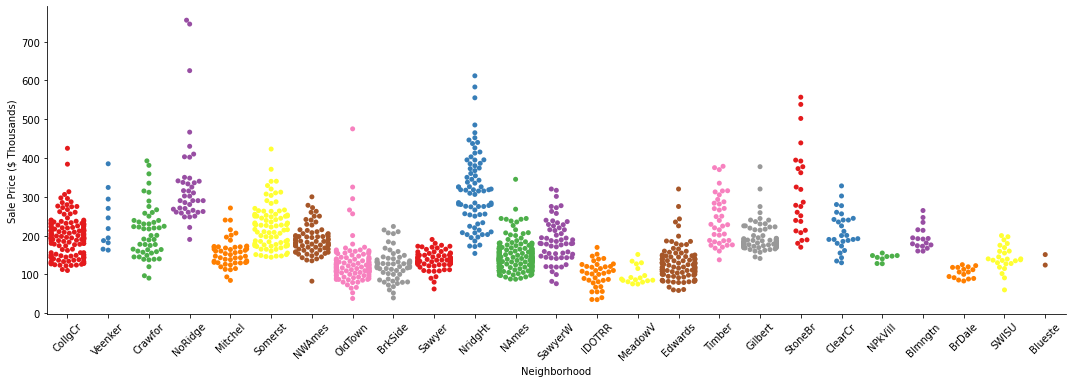

In [ ]:
# create categorical scatterplot
chart = sns.catplot(
    data=neighborhoodDF,
    x='Neighborhood', y='SalePrice1000s',
    kind='swarm',
    palette='Set1',
    height=5, aspect=3
)
sns.set(font_scale = 1.5)
chart.set_xticklabels(rotation=45)
chart.set(ylabel='Sale Price ($ Thousands)')

**The descriptive statistics for each Neighborhood are shown below:**

In [ ]:
collgCrDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='CollgCr']
collgCrDF.describe()

,SalePrice,SalePrice1000s
count,150.000000,150.000000
mean,197965.773333,197.965773
std,51403.666438,51.403666
min,110000.000000,110.000000
25%,152958.750000,152.958750
50%,197200.000000,197.200000
75%,225725.000000,225.725000
max,424870.000000,424.870000


In [ ]:
veenkerDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Veenker']
veenkerDF.describe()

,SalePrice,SalePrice1000s
count,11.000000,11.000000
mean,238772.727273,238.772727
std,72369.317959,72.369318
min,162500.000000,162.500000
25%,184250.000000,184.250000
50%,218000.000000,218.000000
75%,282000.000000,282.000000
max,385000.000000,385.000000


In [ ]:
crawforDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Crawfor']
crawforDF.describe()

,SalePrice,SalePrice1000s
count,51.000000,51.000000
mean,210624.725490,210.624725
std,68866.395472,68.866395
min,90350.000000,90.350000
25%,159250.000000,159.250000
50%,200624.000000,200.624000
75%,239000.000000,239.000000
max,392500.000000,392.500000


In [ ]:
noridgeDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='NoRidge']
noridgeDF.describe()

,SalePrice,SalePrice1000s
count,41.000000,41.000000
mean,335295.317073,335.295317
std,121412.658640,121.412659
min,190000.000000,190.000000
25%,265000.000000,265.000000
50%,301500.000000,301.500000
75%,341000.000000,341.000000
max,755000.000000,755.000000


In [ ]:
somerstDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Somerst']
somerstDF.describe()

,SalePrice,SalePrice1000s
count,86.000000,86.000000
mean,225379.837209,225.379837
std,56177.555888,56.177556
min,144152.000000,144.152000
25%,177975.000000,177.975000
50%,225500.000000,225.500000
75%,252919.500000,252.919500
max,423000.000000,423.000000


In [ ]:
nwAmesDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='NWAmes']
nwAmesDF.describe()

,SalePrice,SalePrice1000s
count,73.000000,73.000000
mean,189050.068493,189.050068
std,37172.218106,37.172218
min,82500.000000,82.500000
25%,165150.000000,165.150000
50%,182900.000000,182.900000
75%,205000.000000,205.000000
max,299800.000000,299.800000


In [ ]:
oldTownDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='OldTown']
oldTownDF.describe()

,SalePrice,SalePrice1000s
count,113.000000,113.000000
mean,128225.300885,128.225301
std,52650.583185,52.650583
min,37900.000000,37.900000
25%,105900.000000,105.900000
50%,119000.000000,119.000000
75%,140000.000000,140.000000
max,475000.000000,475.000000


In [ ]:
brkSideDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='BrkSide']
brkSideDF.describe() 

,SalePrice,SalePrice1000s
count,58.000000,58.000000
mean,124834.051724,124.834052
std,40348.689270,40.348689
min,39300.000000,39.300000
25%,100500.000000,100.500000
50%,124300.000000,124.300000
75%,141175.000000,141.175000
max,223500.000000,223.500000


In [ ]:
sawyerDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Sawyer']
sawyerDF.describe() 

,SalePrice,SalePrice1000s
count,74.000000,74.000000
mean,136793.135135,136.793135
std,22345.129157,22.345129
min,62383.000000,62.383000
25%,127250.000000,127.250000
50%,135000.000000,135.000000
75%,149462.500000,149.462500
max,190000.000000,190.000000


In [ ]:
nRidgHtDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='NridgHt']
nRidgHtDF.describe()

,SalePrice,SalePrice1000s
count,77.000000,77.000000
mean,316270.623377,316.270623
std,96392.544954,96.392545
min,154000.000000,154.000000
25%,253293.000000,253.293000
50%,315000.000000,315.000000
75%,374000.000000,374.000000
max,611657.000000,611.657000


In [ ]:
nAmesDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='NAmes']
nAmesDF.describe()

,SalePrice,SalePrice1000s
count,225.00000,225.000000
mean,145847.08000,145.847080
std,33075.34545,33.075345
min,87500.00000,87.500000
25%,127500.00000,127.500000
50%,140000.00000,140.000000
75%,158000.00000,158.000000
max,345000.00000,345.000000


In [ ]:
sawyerWDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='SawyerW']
sawyerWDF.describe()

,SalePrice,SalePrice1000s
count,59.00000,59.000000
mean,186555.79661,186.555797
std,55651.99782,55.651998
min,76000.00000,76.000000
25%,145500.00000,145.500000
50%,179900.00000,179.900000
75%,222500.00000,222.500000
max,320000.00000,320.000000


In [ ]:
idotrrDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='IDOTRR']
idotrrDF.describe()

,SalePrice,SalePrice1000s
count,37.000000,37.000000
mean,100123.783784,100.123784
std,33376.710117,33.376710
min,34900.000000,34.900000
25%,81000.000000,81.000000
50%,103000.000000,103.000000
75%,120500.000000,120.500000
max,169500.000000,169.500000


In [ ]:
meadowVDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='MeadowV']
meadowVDF.describe() 

,SalePrice,SalePrice1000s
count,17.000000,17.000000
mean,98576.470588,98.576471
std,23491.049610,23.491050
min,75000.000000,75.000000
25%,83500.000000,83.500000
50%,88000.000000,88.000000
75%,115000.000000,115.000000
max,151400.000000,151.400000


In [ ]:
edwardsDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Edwards']
edwardsDF.describe() 

,SalePrice,SalePrice1000s
count,100.000000,100.000000
mean,128219.700000,128.219700
std,43208.616459,43.208616
min,58500.000000,58.500000
25%,101500.000000,101.500000
50%,121750.000000,121.750000
75%,145225.000000,145.225000
max,320000.000000,320.000000


In [ ]:
timberDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Timber']
timberDF.describe() 

,SalePrice,SalePrice1000s
count,38.000000,38.000000
mean,242247.447368,242.247447
std,64845.651549,64.845652
min,137500.000000,137.500000
25%,186900.000000,186.900000
50%,228475.000000,228.475000
75%,286115.750000,286.115750
max,378500.000000,378.500000


In [ ]:
gilbertDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Gilbert']
gilbertDF.describe()

,SalePrice,SalePrice1000s
count,79.000000,79.000000
mean,192854.506329,192.854506
std,35986.779085,35.986779
min,141000.000000,141.000000
25%,174000.000000,174.000000
50%,181000.000000,181.000000
75%,197200.000000,197.200000
max,377500.000000,377.500000


In [ ]:
stoneBrDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='StoneBr']
stoneBrDF.describe() 

,SalePrice,SalePrice1000s
count,25.00000,25.000000
mean,310499.00000,310.499000
std,112969.67664,112.969677
min,170000.00000,170.000000
25%,213500.00000,213.500000
50%,278000.00000,278.000000
75%,377426.00000,377.426000
max,556581.00000,556.581000


In [ ]:
clearCrDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='ClearCr']
clearCrDF.describe()

,SalePrice,SalePrice1000s
count,28.000000,28.000000
mean,212565.428571,212.565429
std,50231.538993,50.231539
min,130000.000000,130.000000
25%,183750.000000,183.750000
50%,200250.000000,200.250000
75%,242225.000000,242.225000
max,328000.000000,328.000000


In [ ]:
nPkVillDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='NPkVill']
nPkVillDF.describe() 

,SalePrice,SalePrice1000s
count,9.000000,9.000000
mean,142694.444444,142.694444
std,9377.314529,9.377315
min,127500.000000,127.500000
25%,140000.000000,140.000000
50%,146000.000000,146.000000
75%,148500.000000,148.500000
max,155000.000000,155.000000


In [ ]:
blmngtnDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Blmngtn']
blmngtnDF.describe() 

,SalePrice,SalePrice1000s
count,17.000000,17.000000
mean,194870.882353,194.870882
std,30393.229219,30.393229
min,159895.000000,159.895000
25%,174000.000000,174.000000
50%,191000.000000,191.000000
75%,213490.000000,213.490000
max,264561.000000,264.561000


In [ ]:
brDaleDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='BrDale']
brDaleDF.describe()

,SalePrice,SalePrice1000s
count,16.000000,16.000000
mean,104493.750000,104.493750
std,14330.176493,14.330176
min,83000.000000,83.000000
25%,91000.000000,91.000000
50%,106000.000000,106.000000
75%,118000.000000,118.000000
max,125000.000000,125.000000


In [ ]:
swisuDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='SWISU']
swisuDF.describe()

,SalePrice,SalePrice1000s
count,25.000000,25.000000
mean,142591.360000,142.591360
std,32622.917679,32.622918
min,60000.000000,60.000000
25%,128000.000000,128.000000
50%,139500.000000,139.500000
75%,160000.000000,160.000000
max,200000.000000,200.000000


In [ ]:
bluesteDF = neighborhoodDF.loc[neighborhoodDF.Neighborhood=='Blueste']
bluesteDF.describe()

,SalePrice,SalePrice1000s
count,2.000000,2.000000
mean,137500.000000,137.500000
std,19091.883092,19.091883
min,124000.000000,124.000000
25%,130750.000000,130.750000
50%,137500.000000,137.500000
75%,144250.000000,144.250000
max,151000.000000,151.000000


COMMENT: The categorical scatterplots and numerical descriptive statistics show different distributions for the different neighborhoods, so it is possible that 'Neighborhood' could have some value as a potential predictor variable.

However, looking at the scatterplot, it is obvious that some neighborhoods have wide ranges of 'SalePrice' and generally possess significant overlaps with other neighborhoods. These circumstances could limit the usefulness of using 'Neighborhood' as a predictor variable

---------------------------------------------------

**'MSZoning'**

Another real estate factor related to "Location, location, location" is the zoning of the parcel where the house is located. This is another categorical variable, with 8 possible categories, although the data only contained 5 of these variables.

A categorical scatterplot was generated for this variable, as well as the the numerical descriptive statistics for each of the categories exhibited in the data.

In [ ]:
# create new dataframe with dependent and independent variable
zoningDF = initDF[['SalePrice','MSZoning']].copy()
zoningDF['SalePrice1000s'] = zoningDF['SalePrice']/1000
zoningDF.shape

(1460, 3)

In [ ]:
# remove rows with missing values, if any
zoningDF.dropna()
zoningDF.shape

(1460, 3)

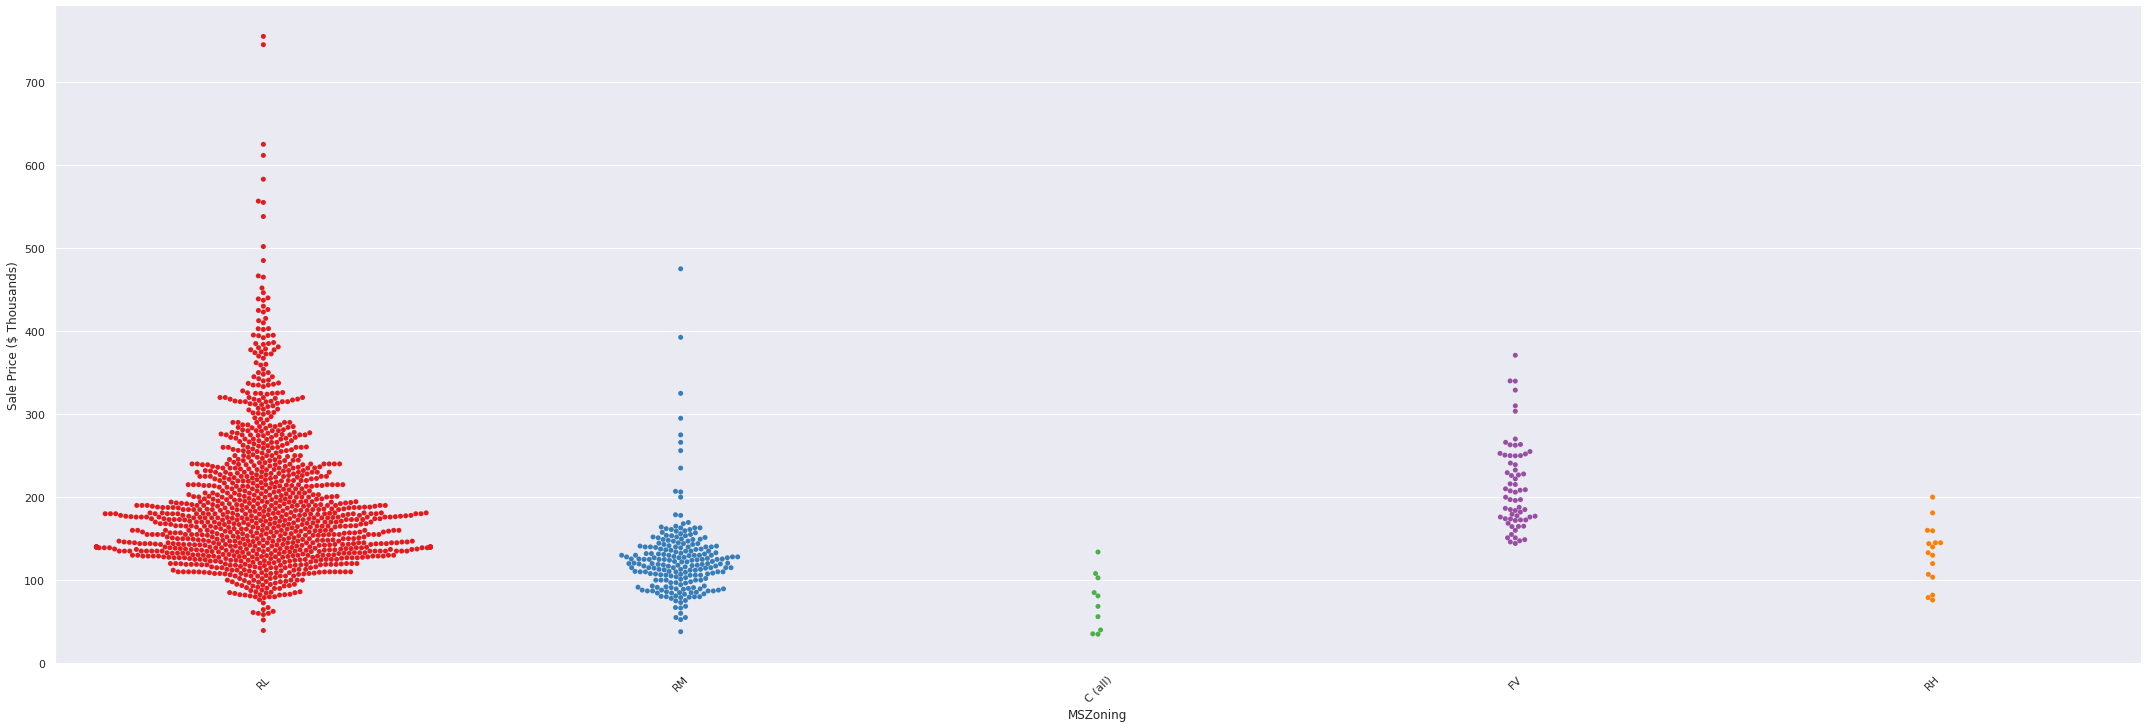

In [ ]:
# create categorical scatterplot
chart = sns.catplot(
    data=zoningDF,
    x='MSZoning', y='SalePrice1000s',
    kind='swarm',
    palette='Set1',
    height=10, aspect=3
)
sns.set(font_scale = 2.5)
chart.set_xticklabels(rotation=45)
chart.set(ylabel='Sale Price ($ Thousands)')

**The descriptive statistics for each type of Zoning are shown below**

In [ ]:
rlDF = zoningDF.loc[zoningDF.MSZoning=='RL']
rlDF.describe() 

,SalePrice,SalePrice1000s
count,1151.000000,1151.000000
mean,191004.994787,191.004995
std,80766.341319,80.766341
min,39300.000000,39.300000
25%,137700.000000,137.700000
50%,174000.000000,174.000000
75%,224700.000000,224.700000
max,755000.000000,755.000000


In [ ]:
rmDF = zoningDF.loc[zoningDF.MSZoning=='RM']
rmDF.describe() 

,SalePrice,SalePrice1000s
count,218.000000,218.00000
mean,126316.830275,126.31683
std,48521.689833,48.52169
min,37900.000000,37.90000
25%,100000.000000,100.00000
50%,120500.000000,120.50000
75%,140000.000000,140.00000
max,475000.000000,475.00000


In [ ]:
cAllDF = zoningDF.loc[zoningDF.MSZoning=='C (all)']
cAllDF.describe() 

,SalePrice,SalePrice1000s
count,10.000000,10.000000
mean,74528.000000,74.528000
std,33791.092031,33.791092
min,34900.000000,34.900000
25%,43998.250000,43.998250
50%,74700.000000,74.700000
75%,98332.000000,98.332000
max,133900.000000,133.900000


In [ ]:
fvDF = zoningDF.loc[zoningDF.MSZoning=='FV']
fvDF.describe() 

,SalePrice,SalePrice1000s
count,65.000000,65.000000
mean,214014.061538,214.014062
std,52369.662067,52.369662
min,144152.000000,144.152000
25%,174000.000000,174.000000
50%,205950.000000,205.950000
75%,250000.000000,250.000000
max,370878.000000,370.878000


In [ ]:
rhDF = zoningDF.loc[zoningDF.MSZoning=='RH']
rhDF.describe() 

,SalePrice,SalePrice1000s
count,16.000000,16.000000
mean,131558.375000,131.558375
std,35714.118435,35.714118
min,76000.000000,76.000000
25%,106150.000000,106.150000
50%,136500.000000,136.500000
75%,148608.500000,148.608500
max,200000.000000,200.000000


COMMENT: The scatterplot and descriptive statistics show varying 'SalePrice' distributions for different Zoning values. However, most of the data is located in the Residential Low Density (RL) zone. The Residential Medium Density (RM) and Floating Village (FV) zonings also possess notable quantities of data, but significantly less than RL category. Therefore, the usefulness of this particular predictor might be limited since most of the data exists in only one factor, and two of the categories, Commercial (C (all)) and Residential High Density (RH) possessed relatively few samples.

-------------------------

**'GrLivArea'**

This continuous, numeric variable describes the above grade living area in square feet. Scatterplots were created for this variable and are shown below.

In [ ]:
# create new dataframe with dependent and independent variable 
grLivAreaDF = initDF[['SalePrice','GrLivArea']].copy()
grLivAreaDF['SalePrice1000s'] = grLivAreaDF['SalePrice']/1000
grLivAreaDF['logGrLivArea'] = np.log(grLivAreaDF['GrLivArea'])
grLivAreaDF['logSalePrice'] = np.log(grLivAreaDF['SalePrice'])
grLivAreaDF.shape

(1460, 5)

In [ ]:
# remove rows with missing values, if any
grLivAreaDF.dropna()
grLivAreaDF.shape

(1460, 5)

[Text(0, 0.5, 'Sale Price ($ Thousands)')]

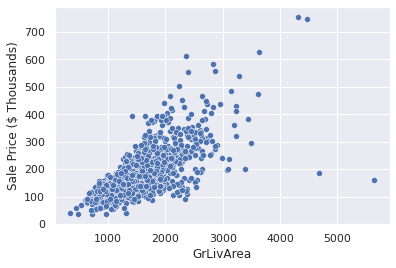

In [ ]:
# create scatterplot (continuous variable)
sns.set(font_scale = 1)
chart = sns.scatterplot(
    data=grLivAreaDF,
    x='GrLivArea', y='SalePrice1000s',
)
chart.set(ylabel='Sale Price ($ Thousands)')

**Note that the scatterplot "fans" out with higher GrLivArea and SalePrice values.  Therefore, try to reduce this "fanning" by using a log transformations.**

[Text(0.5, 0, 'log(GrLivArea)')]

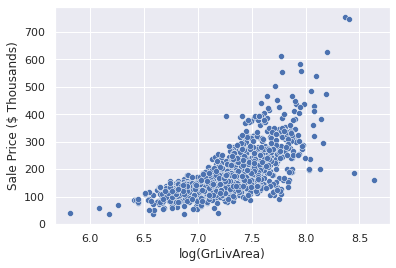

In [ ]:
# try log transformation of the predictor variable
chart = sns.scatterplot(
    data=grLivAreaDF,
    x='logGrLivArea', y='SalePrice1000s'
)
chart.set(ylabel='Sale Price ($ Thousands)')
chart.set(xlabel='log(GrLivArea)')

[Text(0, 0.5, 'Log(Sale Price)')]

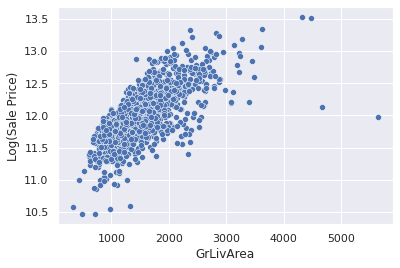

In [ ]:
# try log transformation of the response variable
chart = sns.scatterplot(
    data=grLivAreaDF,
    x='GrLivArea', y='logSalePrice'
)
chart.set(ylabel='Log(Sale Price)')

[Text(0.5, 0, 'Log(GrLivArea)')]

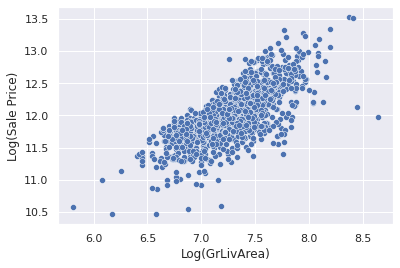

In [ ]:
# try log-Log plot
chart = sns.scatterplot(
    data=grLivAreaDF,
    x='logGrLivArea', y='logSalePrice'
)
chart.set(ylabel='Log(Sale Price)')
chart.set(xlabel='Log(GrLivArea)')

COMMENT:  The log-log plot seems to provide the best linear fit, although this requires transforming the response variable using the log() transformation, and this transformation might not be an optimal transformation with other potential predictor variables. 

--------------------

## Assignment Requirement #4

Perform new feature creation by combining other variables to create a new predictor variable.

As a potential modification to the response variable ('SalePrice'), a "Price per Square Foot" response variable could be created by dividing 'SalePrice' by the above-grade square footage. This is demonstrated below.

In [ ]:
initDF['PricePerSqFt'] = initDF['SalePrice']/initDF['GrLivArea']

# the new variable appears in the last column of the dataframe
initDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PricePerSqFt
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,121.929825
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,143.819334
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,125.139978
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,81.537566
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,113.739763


In [ ]:
# the descriptive statistics of the new variables is shown in the last column
initDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,PricePerSqFt
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,120.572878
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,31.391081
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,28.358738
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,99.822008
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,120.099031
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,138.700041
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,276.250881


-------------------

## Assignment Requirement #5

Perform min-max and standard scaling on the dependent variable (i.e., 'SalePrice') in Python.

In [ ]:
# min-max scaling
salePriceMidValue = (np.max(initDF.SalePrice) + np.min(initDF.SalePrice)) / 2
salePriceRange = np.max(initDF.SalePrice) - np.min(initDF.SalePrice)
initDF['minMaxSalePrice'] = ( (initDF['SalePrice']-salePriceMidValue) / salePriceRange) + 0.5

In [ ]:
# standard scaling
zeroMeanSalePrice = initDF.SalePrice - np.mean(initDF.SalePrice)
initDF['StdScaleSalePrice'] = zeroMeanSalePrice / np.std(initDF.SalePrice)

In [ ]:
# the descriptive statistics of the new variables are shown in the last 2 columns
initDF.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,PricePerSqFt,minMaxSalePrice,StdScaleSalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,120.572878,0.202779,1.180182e-16
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,31.391081,0.110321,1.000343e+00
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,28.358738,0.000000,-1.838704e+00
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,99.822008,0.132030,-6.415162e-01
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,120.099031,0.177892,-2.256643e-01
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,138.700041,0.248715,4.165294e-01
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,276.250881,1.000000,7.228819e+00


COMMENT: Note that in the descriptive statistics of these latest two variables, the min/max scaled variable has a minimum value 0.0 and a maximum value 1.0. The standard-scaled variable has a mean value approximately zero (1.18e-16) and a standard deviation approximately 1.0 (1.000343).

--------------------------------

### INSIGHTS

In this Assignment, three potential predictors were examined for their individual "predictability" with respect to the 'SalePrice' response variable of interest. These predictors were selected based upon common, rule-of-thumb metrics that often arise when discussing real estate valuations. Although individual predictability of the variables is important information, note that an eventual model will commonly include multiple predictors and possibly interactions between predictors.

In addition to evaluating several individual predictors, a new variable was created using combinations of two other variables. Finally, min/max and standard scaling were performed on the dependent variable, 'SalePrice'.